# Carregamento e leitura da tabela

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   Seção que irá ocorrer o download da tabela, visto que o contéudo está no drive. Além de haver a leitura de um arquivo csv e haver o armazenamento.

In [ ]:
# Baixando
!pip install -U -q PyDrive

In [ ]:
# Importando bibliotecas
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google_drive_downloader import GoogleDriveDownloader as gdd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Autenticando para entrar no drive
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# # Baixando o arquivo de metadados de safra artificial 1
# downloaded = drive.CreateFile({'id': '1_H-xSrnVmZ4Lx7td_K-f2yyCILwqbTfL'}) 
# downloaded.GetContentFile('SafraArtificial1.csv')
# print(downloaded['title'], downloaded['mimeType'])

# # Baixando o arquivo de metadados de safra artificial 2
# downloaded = drive.CreateFile({'id': '1T2_WkGYVeYT-2ekRX157GCxfwnBpMrLX'})
# downloaded.GetContentFile('SafraArtificial2.csv')
# print(downloaded['title'], downloaded['mimeType'])

In [ ]:
# Lendo os dados do arquivo de safra artificial 1 30/70
data_safra_artificial_1 = pd.read_csv('/content/drive/Shareddrives/Turing_Labs/csvs/novos_testes/SafraArtificial1-3070.csv')

In [ ]:
# Lendo os dados do arquivo de safra artificial 2 40/60
data_safra_artificial_2 = pd.read_csv('/content/drive/Shareddrives/Turing_Labs/csvs/novos_testes/SafraArtificial2-4060.csv')

In [ ]:
# Lendo os dados do arquivo de safra artificial 3 60/40
data_safra_artificial_3 = pd.read_csv('/content/drive/Shareddrives/Turing_Labs/csvs/novos_testes/SafraArtificial3-6040.csv')

# Modelos - Classificação




##Algoritmos usados:

###**Gradient Boost**

  Algortimo de classficação, é escalável, flexível e contém um ótimo nível de eficiência. Ademais, proporciona árvores boosting paralelas.

###**Árvore de decisão**

Algoritmo de classificação, separa grupos de dados conforme acontece as desições na árvore durante os seus nós, e dependendendo da quantidade níveis acontece a quantidade de decisões.

###**Random Forest**

Algoritmo de classificação, que **seleciona uma amostra de dados do conjunto de treinamento** e  **n variáveis aleatórias** em que estas serão submetidas a cálculos para a criação de um novo nó, e nesse nó o processo dito se repete.

##Pergunta a responder:


Quem não possui atritos com o banco?


##Métricas usadas:

Precisão, Revocação, F1-Score e Acurácia.

## Modelo com proporção de 30/70 para treinamento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dropa a coluna de target
x = data_safra_artificial_1.drop(['ind_atrito'], axis = 1)
y = data_safra_artificial_1['ind_atrito']
# Separa o conjunto teste do de treinamento e o de treinamento recebe 70% dos dados
x_train3070, x_test3070, y_train3070, y_test3070 = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Variável que será utilizada para pegar apenas partes da amostra aos poucos para o treinamento do modelo
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Loop que passa por todas as proporções do conjunto de treinamento para o treinamento do modelo
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train3070, y_train3070)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train3070, y_train3070)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test3070, y_test3070)))

Learning rate:  0.05
Accuracy score (training): 0.760
Accuracy score (validation): 0.756
Learning rate:  0.075
Accuracy score (training): 0.780
Accuracy score (validation): 0.772
Learning rate:  0.1
Accuracy score (training): 0.785
Accuracy score (validation): 0.781
Learning rate:  0.25
Accuracy score (training): 0.787
Accuracy score (validation): 0.785
Learning rate:  0.5
Accuracy score (training): 0.789
Accuracy score (validation): 0.785
Learning rate:  0.75
Accuracy score (training): 0.791
Accuracy score (validation): 0.785
Learning rate:  1
Accuracy score (training): 0.794
Accuracy score (validation): 0.780


In [ ]:
# Teste do modelo
y_pred3070gb = gb_clf.predict(x_test3070)

In [ ]:
# Avaliação
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

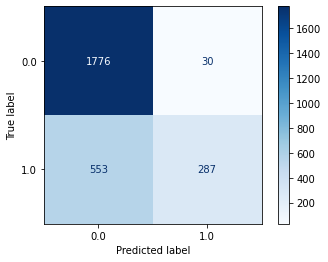

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(gb_clf, x_test3070, y_test3070, cmap='Blues')

In [ ]:
#Aplicação de todas as métricas
print(classification_report(y_test3070, y_pred3070gb))

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86      1806
         1.0       0.91      0.34      0.50       840

    accuracy                           0.78      2646
   macro avg       0.83      0.66      0.68      2646
weighted avg       0.81      0.78      0.74      2646



### Árvore de decisão

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# treinamento do modelo pelo algoritmo da árvore de decisão
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train3070, y_train3070)

In [ ]:
# teste com o modelo
y_pred3070dt = clf.predict(x_test3070)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

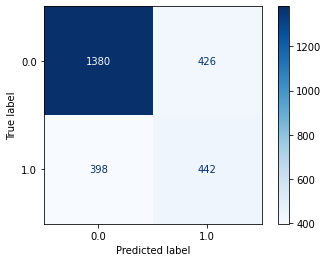

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(clf, x_test3070, y_test3070, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test3070, y_pred3070dt))

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      1806
         1.0       0.51      0.53      0.52       840

    accuracy                           0.69      2646
   macro avg       0.64      0.65      0.64      2646
weighted avg       0.69      0.69      0.69      2646



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# treinamento do modelo pelo algoritmo random forest
rfc = RandomForestClassifier()
rfc.fit(x_train3070, y_train3070)

RandomForestClassifier()

In [ ]:
# teste com o modelo
y_pred3070rf=rfc.predict(x_test3070)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

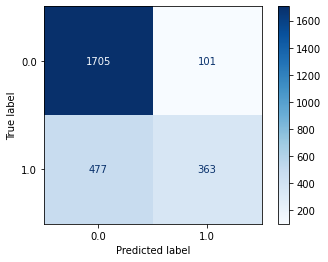

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(rfc, x_test3070, y_test3070, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test3070, y_pred3070rf))

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.86      1806
         1.0       0.78      0.43      0.56       840

    accuracy                           0.78      2646
   macro avg       0.78      0.69      0.71      2646
weighted avg       0.78      0.78      0.76      2646



## Modelo com proporção de 40/60 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dropa a coluna de target
x = data_safra_artificial_2.drop(['ind_atrito'], axis = 1)
y = data_safra_artificial_2['ind_atrito']

# Separa o conjunto teste do de treinamento e o de treinamento recebe 60% dos dados
x_train4060, x_test4060, y_train4060, y_test4060 = train_test_split(x, y,
                                                    test_size = 0.4,
                                                    random_state = 42)


### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Variável que será utilizada para pegar apenas partes da amostra aos poucos para o treinamento do modelo
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Loop que passa por todas as proporções do conjunto de treinamento para o treinamento do modelo
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train4060, y_train4060)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train4060, y_train4060)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test4060, y_test4060)))

Learning rate:  0.05
Accuracy score (training): 0.719
Accuracy score (validation): 0.701
Learning rate:  0.075
Accuracy score (training): 0.723
Accuracy score (validation): 0.708
Learning rate:  0.1
Accuracy score (training): 0.726
Accuracy score (validation): 0.713
Learning rate:  0.25
Accuracy score (training): 0.734
Accuracy score (validation): 0.719
Learning rate:  0.5
Accuracy score (training): 0.743
Accuracy score (validation): 0.721
Learning rate:  0.75
Accuracy score (training): 0.746
Accuracy score (validation): 0.718
Learning rate:  1
Accuracy score (training): 0.740
Accuracy score (validation): 0.720


In [ ]:
# Teste do modelo
y_pred4060gb = gb_clf.predict(x_test4060)

In [ ]:
# Avaliação
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

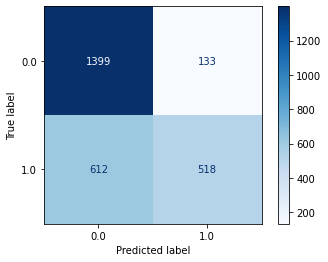

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(gb_clf, x_test4060, y_test4060, cmap='Blues')

In [ ]:
#Aplicação de todas as métricas
print(classification_report(y_test4060, y_pred4060gb))

              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79      1532
         1.0       0.80      0.46      0.58      1130

    accuracy                           0.72      2662
   macro avg       0.75      0.69      0.69      2662
weighted avg       0.74      0.72      0.70      2662



### Árvore de decisão

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# treinamento do modelo pelo algoritmo da árvore de decisão
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train4060, y_train4060)

In [ ]:
# teste com o modelo
y_pred4060dt = clf.predict(x_test4060)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

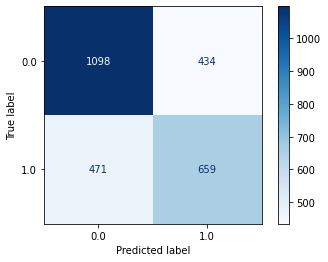

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(clf, x_test4060, y_test4060, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test4060, y_pred4060dt))

              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      1532
         1.0       0.60      0.58      0.59      1130

    accuracy                           0.66      2662
   macro avg       0.65      0.65      0.65      2662
weighted avg       0.66      0.66      0.66      2662



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# treinamento do modelo pelo algoritmo random forest
rfc = RandomForestClassifier()
rfc.fit(x_train4060, y_train4060)

RandomForestClassifier()

In [ ]:
# teste com o modelo
y_pred4060rf=rfc.predict(x_test4060)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

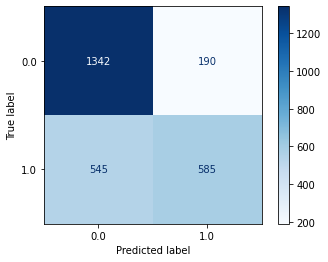

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(rfc, x_test4060, y_test4060, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test4060, y_pred4060rf))

              precision    recall  f1-score   support

         0.0       0.71      0.88      0.79      1532
         1.0       0.75      0.52      0.61      1130

    accuracy                           0.72      2662
   macro avg       0.73      0.70      0.70      2662
weighted avg       0.73      0.72      0.71      2662



## Modelo com proporção de 60/40 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dropa a coluna de target
x = data_safra_artificial_3.drop(['ind_atrito'], axis = 1)
y = data_safra_artificial_3['ind_atrito']

# Separa o conjunto teste do de treinamento e o de treinamento recebe 60% dos dados
x_train6040, x_test6040, y_train6040, y_test6040 = train_test_split(x, y,
                                                    test_size = 0.4,
                                                    random_state = 42)


### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Variável que será utilizada para pegar apenas partes da amostra aos poucos para o treinamento do modelo
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Loop que passa por todas as proporções do conjunto de treinamento para o treinamento do modelo
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train6040, y_train6040)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train6040, y_train6040)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test6040, y_test6040)))

In [ ]:
# Teste do modelo
y_pred6040gb = gb_clf.predict(x_test6040)

In [ ]:
# Avaliação
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

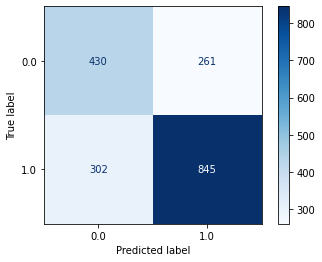

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(gb_clf, x_test6040, y_test6040, cmap='Blues')

In [ ]:
#Aplicação de todas as métricas
print(classification_report(y_test6040, y_pred6040gb))

              precision    recall  f1-score   support

         0.0       0.59      0.62      0.60       691
         1.0       0.76      0.74      0.75      1147

    accuracy                           0.69      1838
   macro avg       0.68      0.68      0.68      1838
weighted avg       0.70      0.69      0.70      1838



### Árvore de decisão

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# treinamento do modelo pelo algoritmo da árvore de decisão
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train6040, y_train6040)

In [ ]:
# teste com o modelo
y_pred6040dt = clf.predict(x_test6040)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

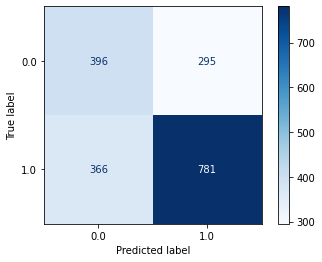

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(clf, x_test6040, y_test6040, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test6040, y_pred6040dt))

              precision    recall  f1-score   support

         0.0       0.52      0.57      0.55       691
         1.0       0.73      0.68      0.70      1147

    accuracy                           0.64      1838
   macro avg       0.62      0.63      0.62      1838
weighted avg       0.65      0.64      0.64      1838



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# treinamento do modelo pelo algoritmo random forest
rfc = RandomForestClassifier()
rfc.fit(x_train6040, y_train6040)

RandomForestClassifier()

In [ ]:
# teste com o modelo
y_pred6040rf=rfc.predict(x_test6040)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

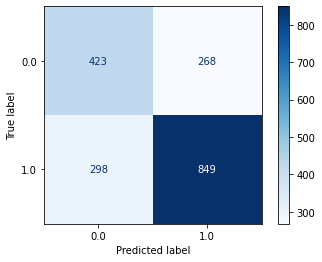

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(rfc, x_test6040, y_test6040, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test6040, y_pred6040rf))

              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60       691
         1.0       0.76      0.74      0.75      1147

    accuracy                           0.69      1838
   macro avg       0.67      0.68      0.67      1838
weighted avg       0.69      0.69      0.69      1838



## Modelo escolhido e avaliação:

 
 Podemos extrair dessa métricas que o melhor algoritmo, baseado na taxa de acurácia e precisão, para ambas as safras, a de proporção 30/70 e de 40/60, seria o random forest, onde as taxas de acurácia e precisão são maiores que as demais, nos trazendo resultados mais satisfatórios ao realizar testes. 


**Matriz de confusão do random forest 30/70:**


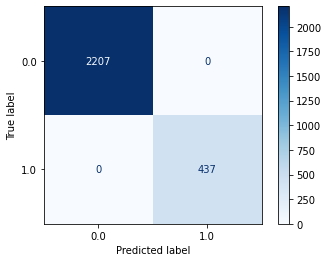